In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Visualiza las 23 columnas
pd.set_option('display.max_columns', 23)
# Carga del CSV en un DataFrame df (usando como delimitador la coma ',')
df = pd.read_csv('train.csv')

In [3]:
df.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio'],
      dtype='object')

In [4]:
# Análisis de los valores booleanos (y cómo varía el precio respecto a ellos)
# print(df.columns) # Devuelve una serie con lon nombres de las columnas
columnas = ['ciudad',
            'provincia',
            'gimnasio',
            'usosmultiples',
            'piscina',
            'escuelascercanas',
            'centroscomercialescercanos',
            'precio'] 

print(columnas)

['ciudad', 'provincia', 'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas', 'centroscomercialescercanos', 'precio']


In [5]:
# Se indica en el Análisis exploratorio de Navent que, de las columnas usadas anterioremente,
# el precio se representa con enteros y las demás columnas son Booleanas

# Se crea un nuevo DataFrame df_abool que copia columnas de interés del DataFrame original
df_abool = df[columnas].copy()
memoria_usada = df_abool.memory_usage()
print('Total memoria usada sin cambios de tipos {:.2f}'.format(memoria_usada.sum()/1024/1024), 'MB')
# Se convierten lo tipos de datos a los requeridos
df_abool['gimnasio'] = df_abool['gimnasio'].astype(np.bool)
df_abool['usosmultiples'] = df_abool['usosmultiples'].astype(np.bool)
df_abool['piscina'] = df_abool['piscina'].astype(np.bool)
df_abool['escuelascercanas'] = df_abool['escuelascercanas'].astype(np.bool)
df_abool['centroscomercialescercanos'] = df_abool['centroscomercialescercanos'].astype(np.bool)
df_abool['precio'] = df_abool['precio'].astype(np.uint32)
print('Total memoria usada sin cambios de tipos {0:.2f}'.format(df_abool.memory_usage().sum()/1024/1024), 'MB')

Total memoria usada sin cambios de tipos 14.65 MB
Total memoria usada sin cambios de tipos 5.72 MB


Media del precio de las propiedades con gimnasio $ 3814127
Media del precio de las propiedades sin gimnasio $ 2445322



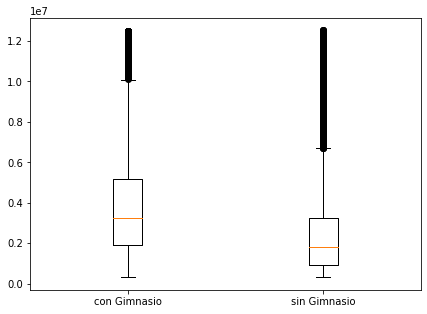

In [6]:
# Comparación directa de los servicios y disponibilidades de las propiedades

print('Media del precio de las propiedades con gimnasio $ {:.0f}'
      .format(df_abool.loc[df_abool['gimnasio'] == True]['precio'].mean()))

print('Media del precio de las propiedades sin gimnasio $ {:.0f}\n'
      .format(df_abool.loc[df_abool['gimnasio'] == False]['precio'].mean()))

fig_1 = plt.figure(1, figsize = (7,5))
sub_fig = fig_1.add_subplot(111)
box_plot = sub_fig.boxplot([df_abool.loc[df_abool['gimnasio'] == True]['precio'], 
                             df_abool.loc[df_abool['gimnasio'] == False]['precio']],
                             labels = ['con Gimnasio', 'sin Gimnasio'])

Media del precio de las propiedades con SUM $ 3827091
Media del precio de las propiedades sin SUM $ 2455262



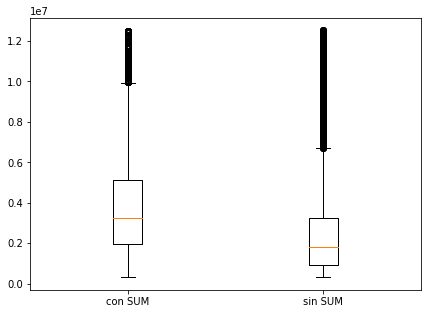

In [7]:
print('Media del precio de las propiedades con SUM $ {:.0f}'
      .format(df_abool.loc[df_abool['usosmultiples'] == True]['precio'].mean()))

print('Media del precio de las propiedades sin SUM $ {:.0f}\n'
      .format(df_abool.loc[df_abool['usosmultiples'] == False]['precio'].mean()))

fig_2 = plt.figure(1, figsize = (7,5))
sub_fig = fig_2.add_subplot(111)
box_plot = sub_fig.boxplot([df_abool.loc[df_abool['usosmultiples'] == True]['precio'], 
                             df_abool.loc[df_abool['usosmultiples'] == False]['precio']],
                             labels = ['con SUM', 'sin SUM'])

Media del precio de las propiedades con piscina $ 3314903
Media del precio de las propiedades sin piscina $ 2455764



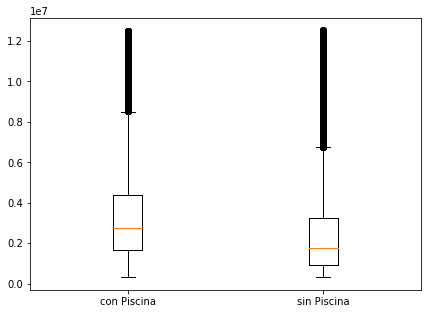

In [8]:
print('Media del precio de las propiedades con piscina $ {:.0f}'
      .format(df_abool.loc[df_abool['piscina'] == True]['precio'].mean()))

print('Media del precio de las propiedades sin piscina $ {:.0f}\n'
      .format(df_abool.loc[df_abool['piscina'] == False]['precio'].mean()))

fig_3 = plt.figure(1, figsize = (7,5))
sub_fig = fig_3.add_subplot(111)
box_plot = sub_fig.boxplot([df_abool.loc[df_abool['piscina'] == True]['precio'],
                             df_abool.loc[df_abool['piscina'] == False]['precio']],
                             labels = ['con Piscina', 'sin Piscina'])

Media del precio de las propiedades con escuelas cercanas $ 2533698
Media del precio de las propiedades sin escuelas cercanas $ 2528554



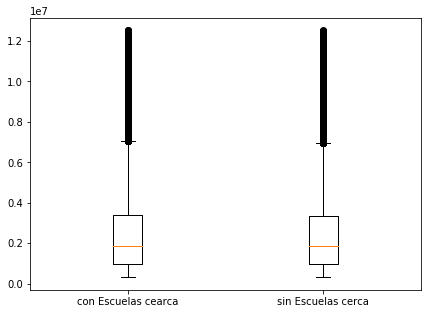

In [9]:
print('Media del precio de las propiedades con escuelas cercanas $ {:.0f}'
      .format(df_abool.loc[df_abool['escuelascercanas'] == True]['precio'].mean()))

print('Media del precio de las propiedades sin escuelas cercanas $ {:.0f}\n'
      .format(df_abool.loc[df_abool['escuelascercanas'] == False]['precio'].mean()))

fig_4 = plt.figure(1, figsize = (7,5))
sub_fig = fig_4.add_subplot(111)
box_plot = sub_fig.boxplot([df_abool.loc[df_abool['escuelascercanas'] == True]['precio'],
                             df_abool.loc[df_abool['escuelascercanas'] == False]['precio']],
                             labels = ['con Escuelas cearca', 'sin Escuelas cerca'])

Media del precio de las propiedades con centros comerciales cencanos $ 2605529
Media del precio de las propiedades sin centros comerciales cencanos $ 2481760



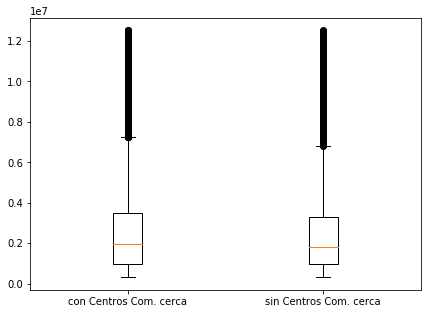

In [10]:
print('Media del precio de las propiedades con centros comerciales cencanos $ {:.0f}'
      .format(df_abool.loc[df_abool['centroscomercialescercanos'] == True]['precio'].mean()))

print('Media del precio de las propiedades sin centros comerciales cencanos $ {:.0f}\n'
      .format(df_abool.loc[df_abool['centroscomercialescercanos'] == False]['precio'].mean()))

fig_5 = plt.figure(1, figsize = (7,5))
sub_fig = fig_5.add_subplot(111)
box_plot3 = sub_fig.boxplot([df_abool.loc[df_abool['centroscomercialescercanos'] == True]['precio'],
                             df_abool.loc[df_abool['centroscomercialescercanos'] == False]['precio']],
                             labels = ['con Centros Com. cerca', 'sin Centros Com. cerca'])